In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rma    = pd.read_csv("2023-07-05_weaver_cpybench_rma.csv")
nonrma = pd.read_csv("2023-07-05_weaver_cpybench_nonrma.csv")

In [3]:
rma["size"] = rma["n"]*rma["n"]*rma["n"]
nonrma["size"] = nonrma["n"]*nonrma["n"]*nonrma["n"]
rma["UPs-mean"] = rma["size"]*rma["N"]/rma["time-mean"]
nonrma["UPs-mean"] = nonrma["size"]*nonrma["N"]/nonrma["time-mean"]
rma["GUPs-mean"] = 1e-9*rma["UPs-mean"]
nonrma["GUPs-mean"] = 1e-9*nonrma["UPs-mean"]

In [4]:
rma.head()

,n,N,time-mean,time-error,time_1to2-mean,time_1to2-error,time_2to1-mean,time_2to1-error,nruns,size,UPs-mean,GUPs-mean
0,20,10000,0.707622,0.004476,0.355373,0.002813,0.350313,0.001641,2,8000,1.130547e+08,0.113055
1,40,10000,0.707993,0.003306,0.352646,0.002190,0.353444,0.001136,2,64000,9.039637e+08,0.903964
2,60,10000,0.714035,0.009677,0.357526,0.006564,0.354578,0.003029,2,216000,3.025064e+09,3.025064
3,80,10000,0.792963,0.005484,0.393502,0.002455,0.397546,0.003056,2,512000,6.456792e+09,6.456792
4,100,10000,0.833106,0.002621,0.415685,0.000687,0.415462,0.001975,2,1000000,1.200328e+10,12.003282


In [5]:
def figure_for_attribute(attribute, ylabel=None):
    maxy_rma    = max(rma[f"{attribute}-mean"])
    maxy_nonrma = max(nonrma[f"{attribute}-mean"])
    if maxy_rma > maxy_nonrma:
        maxy = maxy_rma
    else:
        maxy = maxy_nonrma
    
    if ylabel is None:
        ylabel = attribute
    
    plt.figure(figsize=[10,6])
    plt.plot(rma["n"],    rma[f"{attribute}-mean"],    "*-", label="rma")
    plt.plot(nonrma["n"], nonrma[f"{attribute}-mean"], "*-", label="nonrma")
    plt.title(f"rma versus non-rma copy benchmarck ({attribute.replace('_',' ')})")
    plt.legend()
    plt.xlabel("problem size (cubic array of size n)")
    plt.ylabel(ylabel)
    plt.ylim(0,int(maxy+1))
    plt.show()

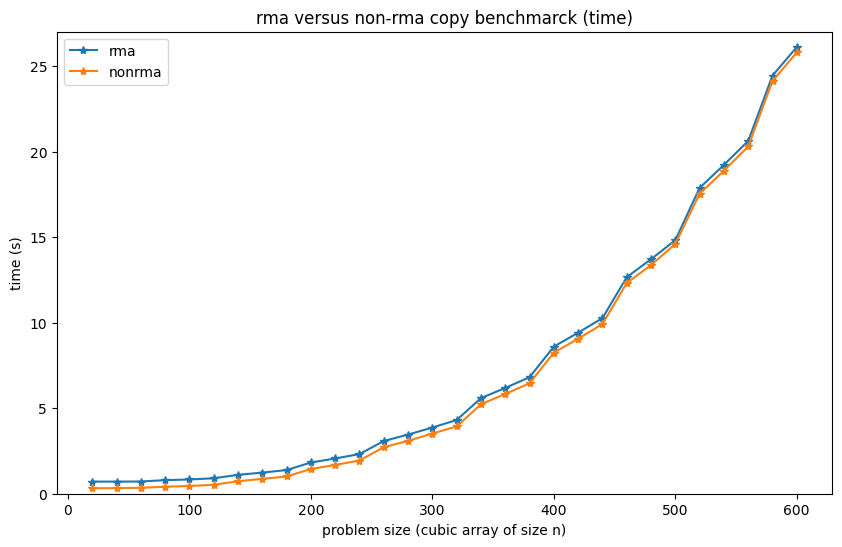

In [6]:
figure_for_attribute("time", "time (s)")

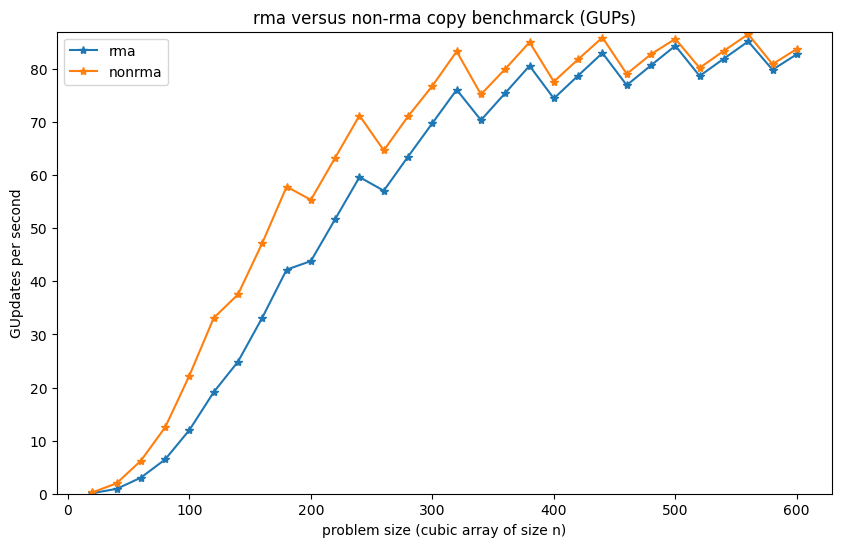

In [7]:
figure_for_attribute("GUPs", "GUpdates per second")